In [17]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn import metrics

In [3]:
# load affair dataset from statsmodel
dta = sm.datasets.fair.load_pandas().data

# add "affair" column: 1 represents having affairs, 0 represents not
dta['affair'] = (dta.affairs > 0).astype(int)

dta.head(10)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666,1
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174,1
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086,1
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999,1
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333,1


In [4]:
dta.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [5]:
dta.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


Text(0,0.5,'Frequency')

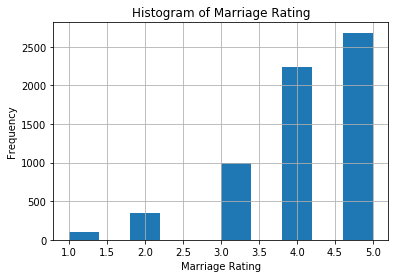

In [6]:

# show plots in the notebook
%matplotlib inline

# histogram of marriage rating
dta.rate_marriage.hist()
plt.title('Histogram of Marriage Rating')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

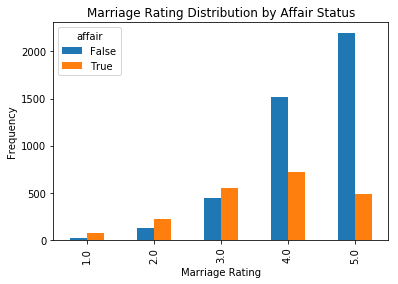

In [7]:
# barplot of marriage rating grouped by affair (True or False)
pd.crosstab(dta.rate_marriage, dta.affair.astype(bool)).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

In [8]:
# create dataframes with an intercept column and dummy variables for
# occupation and occupation_husb
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
                  religious + educ + C(occupation) + C(occupation_husb)',
                  dta, return_type="dataframe")
print(X.columns)


Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')


In [9]:
# rename column names for the dummy variables for better looks:
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
                        'C(occupation)[T.3.0]':'occ_3',
                        'C(occupation)[T.4.0]':'occ_4',
                        'C(occupation)[T.5.0]':'occ_5',
                        'C(occupation)[T.6.0]':'occ_6',
                        'C(occupation_husb)[T.2.0]':'occ_husb_2',
                        'C(occupation_husb)[T.3.0]':'occ_husb_3',
                        'C(occupation_husb)[T.4.0]':'occ_husb_4',
                        'C(occupation_husb)[T.5.0]':'occ_husb_5',
                        'C(occupation_husb)[T.6.0]':'occ_husb_6'})
print(X.head())

   Intercept  occ_2  occ_3  occ_4  occ_5  occ_6  occ_husb_2  occ_husb_3  \
0        1.0    1.0    0.0    0.0    0.0    0.0         0.0         0.0   
1        1.0    0.0    1.0    0.0    0.0    0.0         0.0         0.0   
2        1.0    0.0    1.0    0.0    0.0    0.0         0.0         0.0   
3        1.0    0.0    0.0    0.0    1.0    0.0         0.0         0.0   
4        1.0    0.0    1.0    0.0    0.0    0.0         0.0         0.0   

   occ_husb_4  occ_husb_5  occ_husb_6  rate_marriage   age  yrs_married  \
0         0.0         1.0         0.0            3.0  32.0          9.0   
1         1.0         0.0         0.0            3.0  27.0         13.0   
2         0.0         1.0         0.0            4.0  22.0          2.5   
3         0.0         1.0         0.0            4.0  37.0         16.5   
4         1.0         0.0         0.0            5.0  27.0          9.0   

   children  religious  educ  
0       3.0        3.0  17.0  
1       3.0        1.0  14.0  
2    

In [10]:
#y is reponse vairable and it should be 1-darray, so need to convert dataframe to array
y = np.ravel(y)
print(y)

[ 1.  1.  1. ...,  0.  0.  0.]


In [11]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)
#72% accuracy may seem OK

0.72588752748978946

In [12]:
# what percentage had affairs?
y.mean()
#Only 32% of the women had affairs, which means that you could obtain 68% accuracy by always predicting no

0.32249450204209867

In [13]:
#examine the coeffs
pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_))))

,0,1
0,Intercept,[1.48983589132]
1,occ_2,[0.188066390244]
2,occ_3,[0.498947866816]
3,occ_4,[0.250668564985]
4,occ_5,[0.839008064812]
5,occ_6,[0.833908433744]
6,occ_husb_2,[0.190635944587]
7,occ_husb_3,[0.297832712926]
8,occ_husb_4,[0.161408854076]
9,occ_husb_5,[0.18777091389]


In [15]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

# predict class labels for the test set
predicted = model2.predict(X_test)
print(predicted)

# generate class probabilities
probs = model2.predict_proba(X_test)
print(probs)

[ 1.  0.  0. ...,  0.  0.  0.]
[[ 0.3514634   0.6485366 ]
 [ 0.90955084  0.09044916]
 [ 0.72567333  0.27432667]
 ..., 
 [ 0.55727385  0.44272615]
 [ 0.81207043  0.18792957]
 [ 0.74734601  0.25265399]]


In [19]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test, predicted))
print(metrics.roc_auc_score(y_test, probs[:, 1]))

0.729842931937
0.745950606951


In [20]:
# we can also see the confusion matrix and a classification report with other metrics.
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[1169  134]
 [ 382  225]]
             precision    recall  f1-score   support

        0.0       0.75      0.90      0.82      1303
        1.0       0.63      0.37      0.47       607

avg / total       0.71      0.73      0.71      1910



In [21]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[ 0.72100313  0.70219436  0.73824451  0.70597484  0.70597484  0.72955975
  0.7327044   0.70440252  0.75157233  0.75      ]
0.724163068551


In [22]:
test_sample = np.array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 25, 3, 1, 4, 16]).reshape(1, -1)
model.predict_proba(test_sample)

array([[ 0.77472221,  0.22527779]])

In [ ]:
#The predicted probability of an affair is 23%.